# Image Pyramids

This week in working with image processing techniques I will learn about Image Pyramids. Image Pyramids is a great data structure in computer vision and signal processing that recursively blurs and downsamples/upsamples an image to be displayed in various resolutions. In simple terms, image pyramids are a multi-scale representation of an image. This is helpful with determining which image resolution is best to be displayed based on the device it is being viewed on. For example, viewing an image at full resolution on a monitor is more appropriate than using an EDGE device where having an image at full resolution may not be needed for a smaller screen.

This notebook will look at the [Gaussian pyramid](https://scikit-image.org/docs/stable/auto_examples/transform/plot_pyramid.html) and [Laplacian pyramid](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.pyramid_laplacian) techniques and code follows directly from the Scikit-Image website. Gaussian pyramids are used to downsample images with less resolution and are useful for display resolution, dimensionality reduction (the more an image is downsampled the less spatial/pixel resolution is needed), and efficient search/match. Laplacian pyramids are used to reconstruct an upsampled image from an image lower in the pyramid (with less resolution). [source](https://docs.opencv.org/4.x/d4/d1f/tutorial_pyramids.html)

## Gaussian Pyramid

In [7]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from skimage.transform import pyramid_gaussian, pyramid_laplacian, pyramid_expand
from PIL import Image
%matplotlib inline

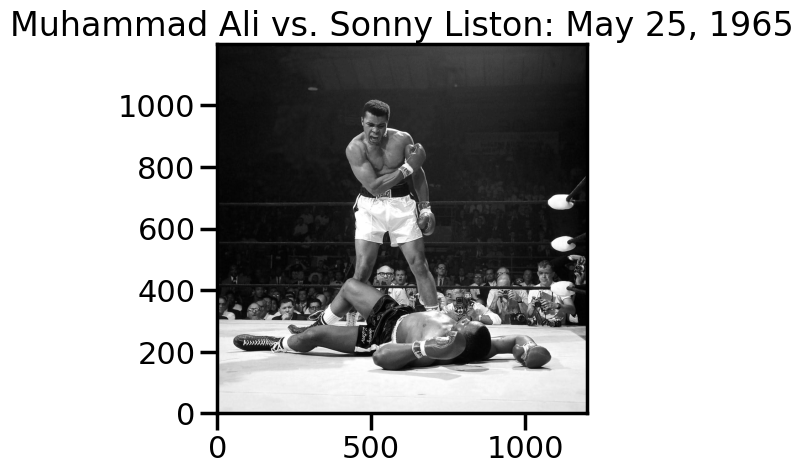

In [61]:
image = np.asarray(Image.open('muhammad-ali.jpg').convert('L'))
plt.title('Muhammad Ali vs. Sonny Liston: May 25, 1965')
plt.imshow(image[::-1], origin='lower', cmap='gray')

In [49]:
image.shape

(1200, 1200)

In their heavyweight title rematch Ali defeated Liston by knockout in the first round. Ali would hold the heavyweight title until 1967, when he was stripped of it for refusing to be drafted into the Army.

Image source is from [Sports Illustrated](https://www.si.com/more-sports/2012/12/17/100-greatest-sports-photos-all-time-final#gid=ci02558776a004279d&pid=antwaan-randle-el).

In [60]:
max(image.flatten())

255

In [50]:
rows, cols = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2))

## Generate a Composite Image

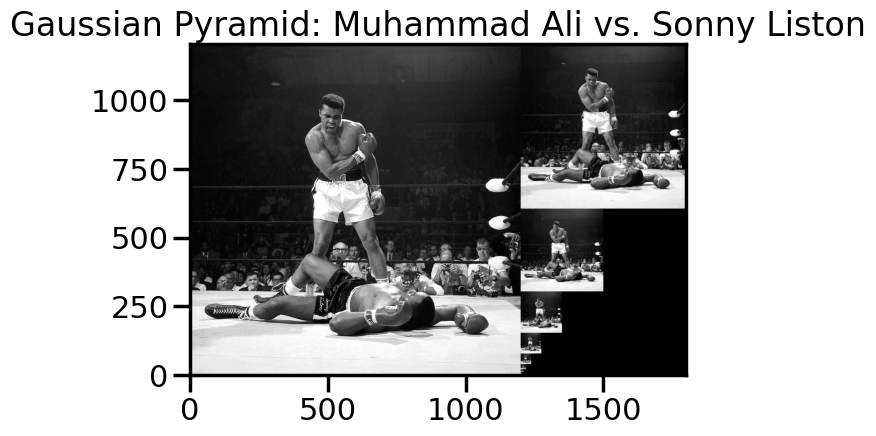

In [63]:
# construct total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols),
                           dtype=np.double)

# display the original image to the left
composite_image[:rows, :cols] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

# plot pyramids
fig, ax = plt.subplots()
ax.imshow(composite_image[::-1], origin='lower', cmap='gray')
plt.title('Gaussian Pyramid: Muhammad Ali vs. Sonny Liston')
sns.set_context('poster')
plt.savefig('poster-gaussian-pyramid-muhammad-ali.png')
plt.show()

As shown in the gaussian pyramid figure above, as the image is recursively blurred (gaussian blur) and downsampled by 1/2 each time, there is less spatial frequency present in the image meaning less pixel information is available and ultimately resulting in a smaller, less detailed image.

### Up Next: Laplacian Pyramid

In [31]:
# Construct the laplacian pyramid
# First level is the same Gaussian pyramid
laplacian_pyramid = [pyramid[-1]]
# pyramid = pyramid[::-1] # reverse pyramid

for i in range(len(pyramid)- 1):
    up = pyramid[i + 1].shape[0] / pyramid[i].shape[0]
    expanded_image = pyramid_expand(pyramid[i], upscale= up)
    print(pyramid[i + 1].shape, expanded_image.shape)
    laplacian_level = pyramid[i + 1] - expanded_image
    laplacian_pyramid.append(laplacian_level)

(2, 2) (2, 2)
(3, 3) (3, 3)
(5, 5) (5, 5)
(10, 10) (10, 10)
(19, 19) (19, 19)
(38, 38) (38, 38)
(75, 75) (75, 75)
(150, 150) (150, 150)
(300, 300) (300, 300)
(600, 600) (600, 600)
(1200, 1200) (1200, 1200)


## Visualize Laplacian Pyramid

In [32]:
len(laplacian_pyramid)

12

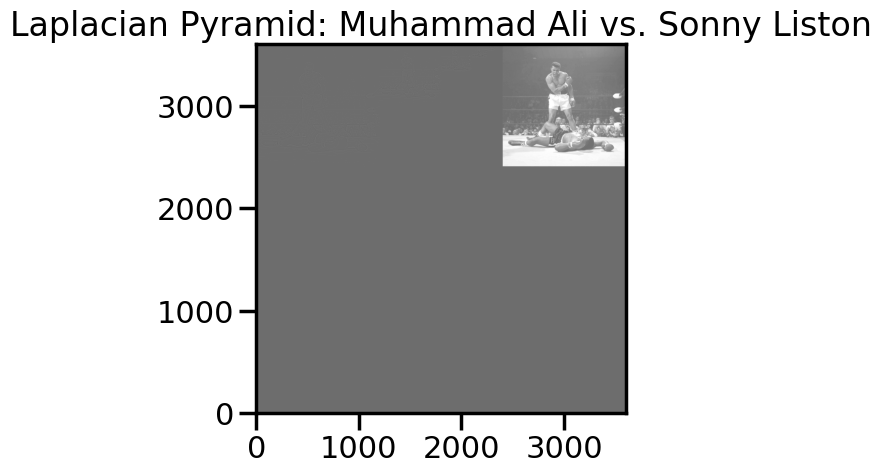

In [87]:
rows, cols = image.shape
comp_rows = max(rows, sum(l.shape[0] for l in laplacian_pyramid))
comp_cols = sum(l.shape[1] for l in laplacian_pyramid)
laplacian_image = np.zeros((comp_rows, comp_cols), dtype=np.double)

col_offset = 0
for level in laplacian_pyramid[::-1]:
  new_rows, new_cols = level.shape[:2]
  laplacian_image[:new_rows, col_offset:col_offset + new_cols] = level
  col_offset += new_cols

# Plot Laplacian pyramids
fig, ax = plt.subplots()
ax.imshow(laplacian_image[::-1], origin='lower', cmap='gray')
plt.title('Laplacian Pyramid: Muhammad Ali vs. Sonny Liston')
#style.use('seaborn-poster')
#plt.savefig('laplacian-pyramid-muhammad-ali.png')
plt.show()

(1200, 1200)


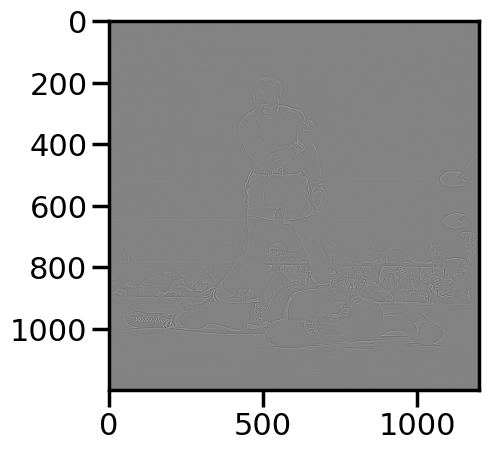

In [64]:
plt.imshow(laplacian_pyramid[-1], cmap='gray') #biggest image
print(laplacian_pyramid[-1].shape)

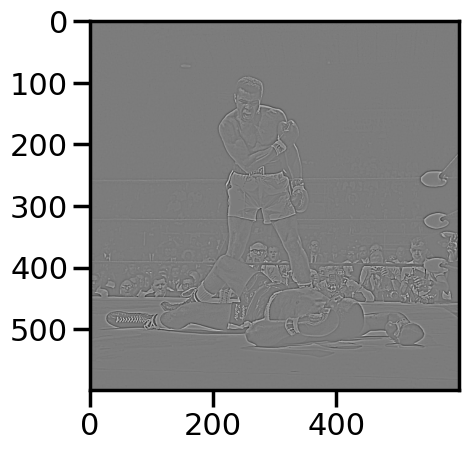

In [66]:
plt.imshow(laplacian_pyramid[-2], cmap='gray') #smallest image

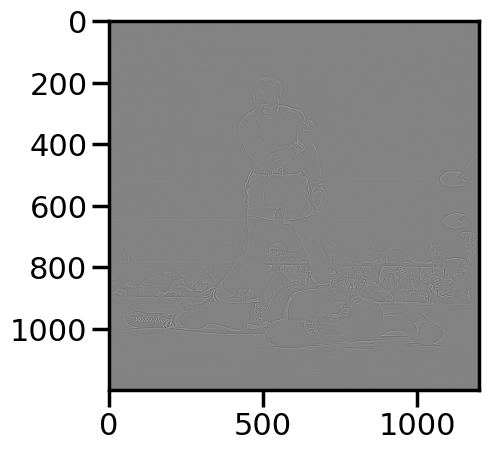

In [85]:
plt.imshow(laplacian_pyramid[11], cmap='gray')